In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('drive/My Drive/Colab Notebooks/Task/Task 7')

In [3]:
import pandas as pd # handle the data
from sklearn.model_selection import train_test_split # split the data

from sklearn import metrics # evaluation metrics
import seaborn as sn # plotting the data
import matplotlib.pyplot as plt # plotting the data

**Importing the dataset**

In [13]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['Gender']=label_encoder.fit_transform(data['Gender'])

**Splitting the dataset into the Training set and Test set**

In [15]:
X=data.iloc[:,1:4]
y=data['Purchased']
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

**Feature Scaling**

# scaling is not require

In [7]:
# from sklearn.preprocessing import StandardScaler # importing the required function
# scaler = StandardScaler() #initialis
# scaler.fit(X_train) # find the values of mu and sigma
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

**Fitting Decision Tree Classification to the Training set**

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split



DecisionTreeClassifier()

**Predicting the Test set results**

In [17]:
# Predict test set labels
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1])

Test set accuracy: 0.90
Test set auc: 0.89


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


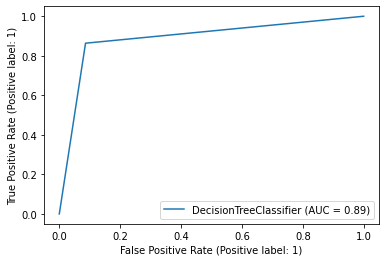

In [18]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dt.predict(X_test) 

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt, X_test, y_test)

**Making the Confusion Matrix**

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score
result=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[29 14]
 [27 10]]


**Visualising the Training set results**

In [19]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()

In [20]:
X_train

,Gender,Age,EstimatedSalary
336,1,58,144000
64,0,59,83000
55,0,24,55000
106,0,26,35000
300,0,58,38000
...,...,...,...
323,0,48,30000
192,1,29,43000
117,1,36,52000
47,0,27,54000


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to 

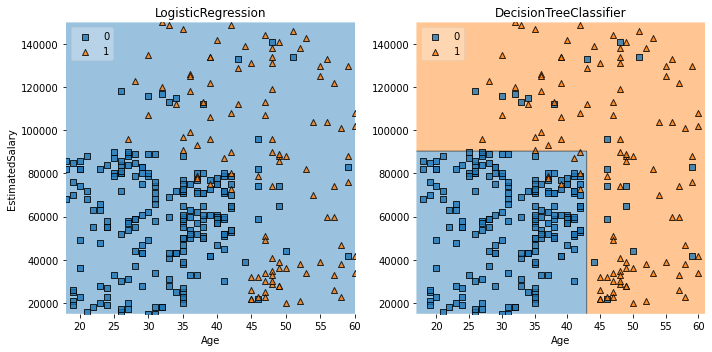

In [24]:
from sklearn.linear_model import LogisticRegression

dt = DecisionTreeClassifier(max_depth=2)
X_train = X_train.loc[:,['Age', 'EstimatedSalary']]
#X_test = X_test.loc[:,['Age', 'EstimatedSalary']]
dt.fit(X_train, y_train)

# Instantiate logreg
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)

clfs = [logreg, dt]

# Review the decision regions of the two classifier
plot_labeled_decision_regions(X_train, y_train, clfs)

**Visualising the Test set results**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to 

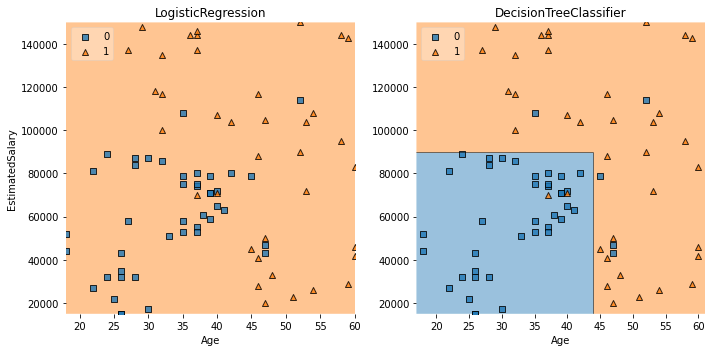

In [25]:
from sklearn.linear_model import LogisticRegression

dt = DecisionTreeClassifier(max_depth=2)
#X_train = X_train.loc[:,['Age', 'EstimatedSalary']]
X_test = X_test.loc[:,['Age', 'EstimatedSalary']]
dt.fit(X_test, y_test)

# Instantiate logreg
logreg = LogisticRegression(random_state=1)
logreg.fit(X_test, y_test)

clfs = [logreg, dt]

# Review the decision regions of the two classifier
plot_labeled_decision_regions(X_test, y_test, clfs)

# Important Features

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from matplotlib import pyplot
dt = DecisionTreeClassifier(max_depth = 2)
# Fit dt to the training set
dt.fit(X_train, y_train)
importance = dt.feature_importances_
#pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,X_test.columns)) # it calculates the feature importances based on IG

[(0.0, 'Gender'),
 (0.6717367124234501, 'Age'),
 (0.32826328757654977, 'EstimatedSalary')]

# Plot Of Decision Tree

[Text(0.5, 0.8333333333333334, 'X[1] <= 89500.0\ngini = 0.497\nsamples = 80\nvalue = [43, 37]'),
 Text(0.25, 0.5, 'X[0] <= 43.5\ngini = 0.404\nsamples = 57\nvalue = [41, 16]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.095\nsamples = 40\nvalue = [38, 2]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.291\nsamples = 17\nvalue = [3, 14]'),
 Text(0.75, 0.5, 'X[1] <= 115500.0\ngini = 0.159\nsamples = 23\nvalue = [2, 21]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]')]

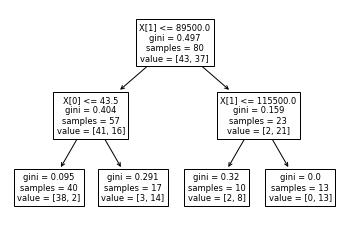

In [26]:
from sklearn import tree
tree.plot_tree(dt) # dt is the decison tree that I have learnt